<a href="https://colab.research.google.com/github/amirahnadiah/DeepLearning/blob/main/Assignment2_Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [265]:
data = pd.read_excel('API_ST.INT.ARVL_DS2_en_excel_v2_3011737.xls')

In [266]:
df = data.iloc[2:]

In [267]:
df.rename(columns =df.iloc[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [268]:
dfnew = df.iloc[1:]

In [269]:
dfnew = dfnew.drop(['Indicator Name', 'Indicator Code'], axis = 1)

In [270]:
dfnew = dfnew.reset_index()

In [271]:
coloums_remove = [float(col) for col in range (1960,1995)]

In [ ]:
coloums_remove

In [273]:
dfnew = dfnew.drop(coloums_remove, axis = 1)

In [274]:
dfnew2 = dfnew.fillna(dfnew.mean())

In [ ]:
dfnew2.head(10)

In [160]:
dfnew2.to_csv('malaysian_tourism_data_1995-2019.csv')

In [ ]:
dfnew2

In [279]:
dfnew3 = dfnew2.drop(['index'], axis = 1)

In [ ]:
dfnew3

In [ ]:
print(dfnew3.info())

In [283]:
dfnew3 = dfnew3.dropna(axis='columns', how='all')

In [ ]:
dfnew3

In [327]:
high_1996 = dfnew3[1996.0].idxmax()

In [328]:
high_1996

259

In [329]:
dfnew3.loc[[259]]

,Country Name,Country Code,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
259,World,WLD,1.024979e+09,1.082486e+09,1.130316e+09,1.145612e+09,1.188192e+09,1.262413e+09,1.231352e+09,1.252355e+09,1.234392e+09,1.363541e+09,1.426061e+09,1.598479e+09,1.652013e+09,1.662876e+09,1.602439e+09,1.667619e+09,1.700644e+09,1.784601e+09,1.852337e+09,1.909107e+09,1.966290e+09,2.031531e+09,2.135215e+09,2.221459e+09,2.280131e+09


In [330]:
dfnew4 = dfnew3.drop([dfnew3.index[259]])

In [331]:
high_1996 = dfnew4[1996.0].idxmax()
high_1996

181

In [332]:
dfnew4.loc[[181]]

,Country Name,Country Code,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
181,OECD members,OED,7.820643e+08,8.175267e+08,8.428156e+08,8.553810e+08,8.688356e+08,8.993974e+08,8.433396e+08,8.313681e+08,8.156120e+08,8.693009e+08,9.020373e+08,1.039695e+09,1.040391e+09,1.034749e+09,9.956581e+08,1.006706e+09,1.021675e+09,1.071525e+09,1.111242e+09,1.144634e+09,1.180486e+09,1.223902e+09,1.277930e+09,1.309831e+09,1.342168e+09


In [355]:
dfnew5 = pd.read_csv('malaysian_tourism_data_1995-2019.csv',index_col='Country Name')
dfnew5


,Unnamed: 0,index,Country Code,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,0,3,ABW,9.120000e+05,9.570000e+05,9.470000e+05,9.060000e+05,9.720000e+05,1.211000e+06,1.178000e+06,1.225000e+06,1.184000e+06,1.304000e+06,1.286000e+06,1.285000e+06,1.254000e+06,1.383000e+06,1.420000e+06,1.394000e+06,1.469000e+06,1.481000e+06,1.667000e+06,1.739000e+06,1.832000e+06,1.758000e+06,1.863000e+06,1.897000e+06,1.951000e+06,NaN
Africa Eastern and Southern,1,4,AFE,1.158354e+07,1.308865e+07,1.345625e+07,1.440385e+07,1.530938e+07,1.535318e+07,1.585470e+07,1.738338e+07,1.784439e+07,1.874595e+07,1.991757e+07,2.265032e+07,2.511490e+07,2.541310e+07,2.596442e+07,2.907150e+07,3.165024e+07,3.274855e+07,3.442663e+07,3.573839e+07,3.531868e+07,3.764589e+07,3.825835e+07,4.118915e+07,3.982670e+07,NaN
Afghanistan,2,5,AFG,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,6.148751e+07,6.238510e+07,6.560918e+07,6.813359e+07,6.989868e+07,7.134851e+07,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,NaN
Africa Western and Central,3,6,AFW,2.670706e+06,3.027135e+06,3.243144e+06,3.422652e+06,3.897975e+06,4.162850e+06,4.615887e+06,4.697120e+06,5.013050e+06,5.839377e+06,6.320832e+06,6.955607e+06,9.389591e+06,1.015759e+07,1.056971e+07,1.107080e+07,8.902380e+06,1.022103e+07,1.008582e+07,1.054462e+07,1.331168e+07,1.315078e+07,8.029180e+07,8.639792e+07,9.003628e+07,NaN
Angola,4,7,AGO,9.000000e+03,2.100000e+04,4.500000e+04,5.200000e+04,4.500000e+04,5.100000e+04,6.700000e+04,9.100000e+04,1.070000e+05,1.940000e+05,2.100000e+05,1.210000e+05,1.950000e+05,2.940000e+05,3.660000e+05,4.250000e+05,4.810000e+05,5.280000e+05,6.500000e+05,5.950000e+05,5.920000e+05,3.970000e+05,2.610000e+05,2.180000e+05,2.180000e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,261,264,XKX,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,6.148751e+07,6.238510e+07,6.560918e+07,6.813359e+07,6.989868e+07,7.134851e+07,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,NaN
"Yemen, Rep.",262,265,YEM,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,1.035000e+06,1.175000e+06,1.282000e+06,1.323000e+06,1.218000e+06,3.980000e+05,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,NaN
South Africa,263,266,ZAF,4.684000e+06,5.186000e+06,5.170000e+06,5.898000e+06,6.026000e+06,6.001000e+06,5.908000e+06,6.550000e+06,6.640000e+06,6.815000e+06,7.518000e+06,8.509000e+06,9.208000e+06,9.729000e+06,9.532000e+06,1.130300e+07,1.209700e+07,1.306900e+07,1.431800e+07,1.453000e+07,1.395200e+07,1.512100e+07,1.497500e+07,1.500400e+07,1.479700e+07,NaN


In [406]:
dfnew5.drop('2020.0', axis=1, inplace=True)

In [407]:
dfnew5

,Unnamed: 0,index,Country Code,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,sum
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,0,3,ABW,9.120000e+05,9.570000e+05,9.470000e+05,9.060000e+05,9.720000e+05,1.211000e+06,1.178000e+06,1.225000e+06,1.184000e+06,1.304000e+06,1.286000e+06,1.285000e+06,1.254000e+06,1.383000e+06,1.420000e+06,1.394000e+06,1.469000e+06,1.481000e+06,1.667000e+06,1.739000e+06,1.832000e+06,1.758000e+06,1.863000e+06,1.897000e+06,1.951000e+06,3.447500e+07
Africa Eastern and Southern,1,4,AFE,1.158354e+07,1.308865e+07,1.345625e+07,1.440385e+07,1.530938e+07,1.535318e+07,1.585470e+07,1.738338e+07,1.784439e+07,1.874595e+07,1.991757e+07,2.265032e+07,2.511490e+07,2.541310e+07,2.596442e+07,2.907150e+07,3.165024e+07,3.274855e+07,3.442663e+07,3.573839e+07,3.531868e+07,3.764589e+07,3.825835e+07,4.118915e+07,3.982670e+07,6.279577e+08
Afghanistan,2,5,AFG,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,6.148751e+07,6.238510e+07,6.560918e+07,6.813359e+07,6.989868e+07,7.134851e+07,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,1.466780e+09
Africa Western and Central,3,6,AFW,2.670706e+06,3.027135e+06,3.243144e+06,3.422652e+06,3.897975e+06,4.162850e+06,4.615887e+06,4.697120e+06,5.013050e+06,5.839377e+06,6.320832e+06,6.955607e+06,9.389591e+06,1.015759e+07,1.056971e+07,1.107080e+07,8.902380e+06,1.022103e+07,1.008582e+07,1.054462e+07,1.331168e+07,1.315078e+07,8.029180e+07,8.639792e+07,9.003628e+07,4.179963e+08
Angola,4,7,AGO,9.000000e+03,2.100000e+04,4.500000e+04,5.200000e+04,4.500000e+04,5.100000e+04,6.700000e+04,9.100000e+04,1.070000e+05,1.940000e+05,2.100000e+05,1.210000e+05,1.950000e+05,2.940000e+05,3.660000e+05,4.250000e+05,4.810000e+05,5.280000e+05,6.500000e+05,5.950000e+05,5.920000e+05,3.970000e+05,2.610000e+05,2.180000e+05,2.180000e+05,6.233011e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,261,264,XKX,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,6.148751e+07,6.238510e+07,6.560918e+07,6.813359e+07,6.989868e+07,7.134851e+07,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,1.466780e+09
"Yemen, Rep.",262,265,YEM,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,1.035000e+06,1.175000e+06,1.282000e+06,1.323000e+06,1.218000e+06,3.980000e+05,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,1.074349e+09
South Africa,263,266,ZAF,4.684000e+06,5.186000e+06,5.170000e+06,5.898000e+06,6.026000e+06,6.001000e+06,5.908000e+06,6.550000e+06,6.640000e+06,6.815000e+06,7.518000e+06,8.509000e+06,9.208000e+06,9.729000e+06,9.532000e+06,1.130300e+07,1.209700e+07,1.306900e+07,1.431800e+07,1.453000e+07,1.395200e+07,1.512100e+07,1.497500e+07,1.500400e+07,1.479700e+07,2.425405e+08


In [412]:
dfnew5["sum"] = dfnew5.sum(axis=1)
dfnew5

,Unnamed: 0,index,Country Code,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,sum
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,0,3,ABW,9.120000e+05,9.570000e+05,9.470000e+05,9.060000e+05,9.720000e+05,1.211000e+06,1.178000e+06,1.225000e+06,1.184000e+06,1.304000e+06,1.286000e+06,1.285000e+06,1.254000e+06,1.383000e+06,1.420000e+06,1.394000e+06,1.469000e+06,1.481000e+06,1.667000e+06,1.739000e+06,1.832000e+06,1.758000e+06,1.863000e+06,1.897000e+06,1.951000e+06,6.895001e+07
Africa Eastern and Southern,1,4,AFE,1.158354e+07,1.308865e+07,1.345625e+07,1.440385e+07,1.530938e+07,1.535318e+07,1.585470e+07,1.738338e+07,1.784439e+07,1.874595e+07,1.991757e+07,2.265032e+07,2.511490e+07,2.541310e+07,2.596442e+07,2.907150e+07,3.165024e+07,3.274855e+07,3.442663e+07,3.573839e+07,3.531868e+07,3.764589e+07,3.825835e+07,4.118915e+07,3.982670e+07,1.255915e+09
Afghanistan,2,5,AFG,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,6.148751e+07,6.238510e+07,6.560918e+07,6.813359e+07,6.989868e+07,7.134851e+07,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,2.933560e+09
Africa Western and Central,3,6,AFW,2.670706e+06,3.027135e+06,3.243144e+06,3.422652e+06,3.897975e+06,4.162850e+06,4.615887e+06,4.697120e+06,5.013050e+06,5.839377e+06,6.320832e+06,6.955607e+06,9.389591e+06,1.015759e+07,1.056971e+07,1.107080e+07,8.902380e+06,1.022103e+07,1.008582e+07,1.054462e+07,1.331168e+07,1.315078e+07,8.029180e+07,8.639792e+07,9.003628e+07,8.359927e+08
Angola,4,7,AGO,9.000000e+03,2.100000e+04,4.500000e+04,5.200000e+04,4.500000e+04,5.100000e+04,6.700000e+04,9.100000e+04,1.070000e+05,1.940000e+05,2.100000e+05,1.210000e+05,1.950000e+05,2.940000e+05,3.660000e+05,4.250000e+05,4.810000e+05,5.280000e+05,6.500000e+05,5.950000e+05,5.920000e+05,3.970000e+05,2.610000e+05,2.180000e+05,2.180000e+05,1.246602e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,261,264,XKX,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,6.148751e+07,6.238510e+07,6.560918e+07,6.813359e+07,6.989868e+07,7.134851e+07,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,2.933561e+09
"Yemen, Rep.",262,265,YEM,3.792342e+07,3.954433e+07,4.129982e+07,4.115132e+07,4.281754e+07,4.510920e+07,4.375323e+07,4.497683e+07,4.637375e+07,5.426021e+07,5.617081e+07,6.057587e+07,6.193796e+07,6.132160e+07,6.002198e+07,1.035000e+06,1.175000e+06,1.282000e+06,1.323000e+06,1.218000e+06,3.980000e+05,7.395350e+07,8.029180e+07,8.639792e+07,9.003628e+07,2.148698e+09
South Africa,263,266,ZAF,4.684000e+06,5.186000e+06,5.170000e+06,5.898000e+06,6.026000e+06,6.001000e+06,5.908000e+06,6.550000e+06,6.640000e+06,6.815000e+06,7.518000e+06,8.509000e+06,9.208000e+06,9.729000e+06,9.532000e+06,1.130300e+07,1.209700e+07,1.306900e+07,1.431800e+07,1.453000e+07,1.395200e+07,1.512100e+07,1.497500e+07,1.500400e+07,1.479700e+07,4.850811e+08


In [413]:
column = dfnew5["sum"]
max_value = column.max()


print(max_value)

78812878941.45776


In [416]:
highest = dfnew5['sum'].idxmax()
highest

'World'

In [ ]:
dfnew5.drop(labels=["World"], axis=0, inplace=True)
dfnew5

In [425]:
dfnew5.drop(labels=["High income"], axis=0, inplace=True)

KeyError: ignored

In [426]:
highest = dfnew5['sum'].idxmax()
highest

'OECD members'

Text(0, 0.5, 'Tourists')

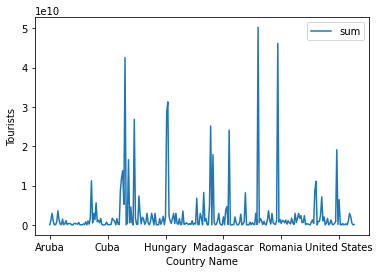

In [436]:
dfnew5['sum'].plot()
plt.legend(loc='best')
#plt.xticks(rotation=90)
plt.xlabel('Country Name')
plt.ylabel('Tourists')


In [437]:
column = dfnew5["sum"]
max_value = column.max()


print(max_value)

50256538815.957886
